<a href="https://colab.research.google.com/github/babakansari/DeepLearning/blob/master/Assignment_2_Babak_Ansari_Convolutional_Neural_Nets_and_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 - Babak Ansari-Jaberi

## Data Prepration

### Flowser images should be downloaded into the current folder
  
Creating a function to resize the image files in `flower_photos` folder and save them into a new `rezied_flower_photos`  folder

In [1]:
#!pip3 install PIL  --allow-unverified PIL --allow-all-external
%config IPCompleter.greedy=True

Function to convert image sizes

In [2]:
import os, sys
from PIL import Image

# Function to resize a single image
def resize_photo(infile, width, height):   
    size = width, height
    outfile = 'rezied_'+infile

    if not os.path.exists(os.path.dirname(outfile)):
        try:
            os.makedirs(os.path.dirname(outfile))
        except OSError as exc: # Guard against race condition
            raise

    try:
        im = Image.open(infile)
        im.thumbnail(size, Image.ANTIALIAS) 
        im.save(outfile, "JPEG")
        im = Image.open(outfile)
    except IOError:
        raise
    return im

Function to resize images and save refrances to Data Frame:

In [3]:
import pandas as pd
from os import listdir
from os.path import isfile, join
from IPython.display import clear_output # Print on the same line to show the progress

# Function to resize all the image files in a folder
def resize_all_photos(idx, image_path):
    flower_kind = image_path.replace('flower_photos', '').replace('/','')
    
    onlyfiles = [f for f in listdir(image_path) if isfile(join(image_path, f))]

    df = pd.DataFrame(columns=['id', 'kind', 'path'])
    
    for imgfile in onlyfiles:
        clear_output(wait=True)
        print('Resize files in "' + image_path + '" folder.\r\n'+ imgfile)
        img_loc = image_path+imgfile
        img = resize_photo(img_loc, 150, 150)
        df.loc[idx] = [idx, flower_kind, img_loc]
        idx=idx+1
    clear_output(wait=True)
    print('Resize files in "' + image_path + '" folder is finished.')
    return df

### The images have different dimensions. Resize all of them to 150x150.
Create a data frame of the flowers and their kind:

In [4]:
daisy_df = resize_all_photos(0, 'flower_photos/daisy/')
dandelion_df = resize_all_photos(len(daisy_df)+1, 'flower_photos/dandelion/')
roses_df = resize_all_photos(len(dandelion_df)+1, 'flower_photos/roses/')
sunflowers_df = resize_all_photos(len(roses_df)+1, 'flower_photos/sunflowers/')
tulips_df = resize_all_photos(len(sunflowers_df)+1, 'flower_photos/tulips/')

df_main = daisy_df.append(dandelion_df).append(roses_df).append(sunflowers_df).append(tulips_df).sort_values(by=['kind'])

Resize files in "flower_photos/tulips/" folder is finished.


In [21]:
# One hot encoding the flower kinds
df = pd.concat([df_main,pd.get_dummies(df_main['kind'], drop_first=True)],axis=1)
df.describe()

,id,kind,path,dandelion,roses,sunflowers,tulips
0,0,daisy,flower_photos/daisy/100080576_f52e8ee070_n.jpg,0,0,0,0
418,418,daisy,flower_photos/daisy/4858518329_7563eb0baa_m.jpg,0,0,0,0
419,419,daisy,flower_photos/daisy/4861391074_c3e122dab0_m.jpg,0,0,0,0
420,420,daisy,flower_photos/daisy/4865691548_00319261b8.jpg,0,0,0,0
421,421,daisy,flower_photos/daisy/488202750_c420cbce61.jpg,0,0,0,0
...,...,...,...,...,...,...,...
969,969,tulips,flower_photos/tulips/16582481123_06e8e6b966_n.jpg,0,0,0,1
970,970,tulips,flower_photos/tulips/16594995743_ce72c61201_n.jpg,0,0,0,1
971,971,tulips,flower_photos/tulips/16644790896_7b296ecd67_n.jpg,0,0,0,1
961,961,tulips,flower_photos/tulips/16282277874_b92776b194.jpg,0,0,0,1


### Split images to 75-25% for training and test:

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.25, shuffle=True)

### Make sure you have the same distribution of flower types between train and test datasets:
The distribution of the rows are the same for both train and test.
As you could see in bellow statistical summary for train and test set. The average number of all flower kinds are very close. Meaning that each flower kind is distributed evenly in test and training set.

In [11]:
train.describe()

,dandelion,roses,sunflowers,tulips
count,2752.000000,2752.000000,2752.000000,2752.000000
mean,0.244913,0.173328,0.189680,0.219113
std,0.430114,0.378600,0.392119,0.413721
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [22]:
test.describe()

,dandelion,roses,sunflowers,tulips
count,918.000000,918.000000,918.000000,918.000000
mean,0.244009,0.178649,0.192810,0.213508
std,0.429732,0.383267,0.394721,0.410006
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


Create data frames with total flower kinds:

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

df_kinds = pd.DataFrame({'count' : df.groupby( [ "kind" ] ).size()}).reset_index()
train_kinds = pd.DataFrame({'count' : train.groupby( [ "kind" ] ).size()}).reset_index()
test_kinds = pd.DataFrame({'count' : test.groupby( [ "kind" ] ).size()}).reset_index()
df_kinds

,kind,count
0,daisy,633
1,dandelion,898
2,roses,641
3,sunflowers,699
4,tulips,799


Normalize the counts

In [54]:
from sklearn import preprocessing


df_kinds[['count']] = preprocessing.minmax_scale(df_kinds[['count']])
train_kinds[['count']] = preprocessing.minmax_scale(train_kinds[['count']])
test_kinds[['count']] = preprocessing.minmax_scale(test_kinds[['count']])

The following graph is also showing that the distribution of flower kinds are normal between Blue (Entire set), Red (Train set) and (Green set)

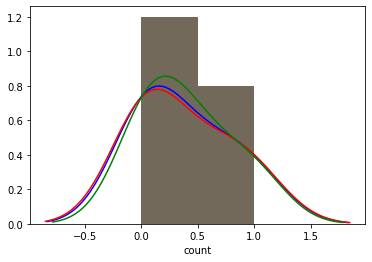

In [55]:
sns.distplot(df_kinds['count'], color="Blue", label="All")
sns.distplot(train_kinds['count'], color="Red")
sns.distplot(test_kinds['count'], color="Green")

The following bar charts are also showing the distribution of flower kinds are the same (With different scaling) on test and training data sets

[Text(0, 0, 'daisy'),
 Text(0, 0, 'dandelion'),
 Text(0, 0, 'roses'),
 Text(0, 0, 'sunflowers'),
 Text(0, 0, 'tulips')]

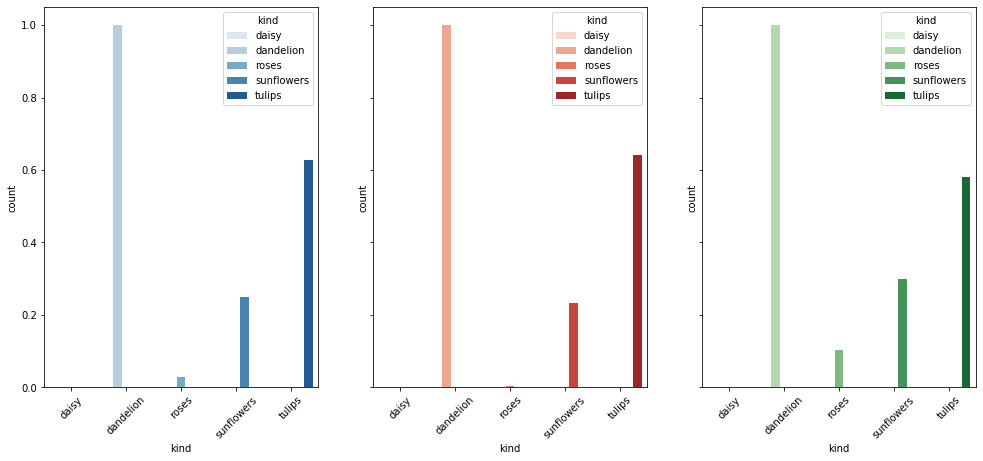

In [61]:

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(16.7, 7))

a1 = sns.barplot(x="kind", y="count", hue="kind", data=df_kinds, palette="Blues", ax=ax1)
a2 = sns.barplot(x="kind", y="count", hue="kind", data=train_kinds, palette="Reds", ax=ax2)
a3 = sns.barplot(x="kind", y="count", hue="kind", data=test_kinds, palette="Greens", ax=ax3)

a1.set_xticklabels(a1.get_xticklabels(), rotation=45)
a2.set_xticklabels(a2.get_xticklabels(), rotation=45)
a3.set_xticklabels(a3.get_xticklabels(), rotation=45)



## Model

###  Use a VGG16 model (pre-trained on ImageNet)
Use VGG16 class has a parameter called `include_top` which could remove the top layers (fully connected layers) when is set `False`. But here I would try to remove them manually so load them all.

In [141]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np

#Get back the convolutional part of a VGG network trained on ImageNet
#model_vgg16_conv = VGG16(weights='imagenet', include_top=True, input_shape=(224,224,3))
model_vgg16_conv = VGG16(weights='imagenet', include_top=True)
model_vgg16_conv.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Remove last four dense layers

In [142]:
model_vgg16_conv.layers.pop()
model_vgg16_conv.layers.pop()
model_vgg16_conv.layers.pop()
model_vgg16_conv.layers.pop()
model_vgg16_conv.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Add fully connected layers
One with 256 nodes using ‘relu’ activation and output layer with 5 nodes and ‘softmax’ activation

In [143]:
# Define the inpuy shape of the new model as ouput shape of the VGG16
last_layer = model_vgg16_conv.get_layer('block5_pool').output_shape[1:]


In [144]:
from keras.models import Sequential
from keras.layers import Dropout

# CREATE A TOP MODEL

top_model = Sequential()

#top_model.add(Flatten(input_shape=model_vgg16_conv.output_shape))
top_model.add(Flatten(input_shape=last_layer[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(5, activation='softmax'))
# top_model.load_weights(top_model_weights_path)
top_model.summary()

    


Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (None, 3584)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               917760    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 1285      
Total params: 919,045
Trainable params: 919,045
Non-trainable params: 0
_________________________________________________________________


In [140]:

    
# CREATE AN "REAL" MODEL FROM VGG16
# BY COPYING ALL THE LAYERS OF VGG16
new_model = Sequential()
for l in model_vgg16_conv.layers:
    print(l)
    new_model.add(l)


# CONCATENATE THE TWO MODELS
#new_model.add(top_model)

# LOCK THE TOP CONV LAYERS
# for layer in new_model.layers:
#     layer.trainable = False


ValueError: Input 0 is incompatible with layer block1_conv1: expected ndim=4, found ndim=2

In [96]:
#model_vgg16_conv.add(Flatten())
# model_vgg16_conv.add(Dense(256, activation='relu'))
# model_vgg16_conv.add(Dropout(0.5))
# model_vgg16_conv.add(Dense(5, activation='softmax'))


last = model_vgg16_conv.output

x = Flatten()(last)
x = Dense(256, activation='relu')(x)
preds = Dense(5, activation='softmax')(x)

model = Model(initial_model.input, preds)

# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model_vgg16_conv.compile(loss='categorical_crossentropy', optimizer=sgd)

# model_vgg16_conv.fit(x_train, y_train, batch_size=32, epochs=10)
# score = model.evaluate(x_test, y_test, batch_size=32)

ValueError: Input 0 is incompatible with layer flatten_6: expected min_ndim=3, found ndim=2